In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# loading dataset
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

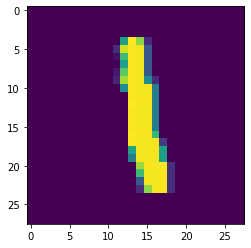

In [39]:
plt.imshow(trainsetX[6])
plt.show

In [40]:
print(trainsety[6])

1


In [41]:
import tensorflow as tf

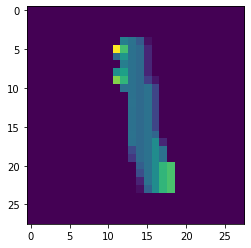

In [42]:
x_train=tf.keras.utils.normalize(trainsetX,axis=1)
x_test=tf.keras.utils.normalize(testsetX,axis=1)
plt.imshow(x_train[6])

In [43]:
print(x_train[6])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D

In [46]:
# creating convolution layers and pooling

model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [47]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [48]:
model =Sequential()
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [49]:
# Flattening, full connection(dense), output layer(activation)
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [50]:
model.add(Dense(32))
model.add(Activation("relu"))

In [51]:
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [52]:
# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                692288    
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [58]:
#TRAINING THE CNN
#Compiling the CNN
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [59]:
#Training the CNN on the Training set and evaluating it on the Test set
model.fit(x_trainr,trainsety,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.0869 - val_accuracy: 0.9773
Epoch 2/5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0783 - val_accuracy: 0.9781
Epoch 3/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.0858 - val_accuracy: 0.9802
Epoch 4/5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.0919 - val_accuracy: 0.9789
Epoch 5/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.1089 - val_accuracy: 0.9766


In [55]:
#Model prediction
prediction=model.predict([x_testr])
print(prediction)

[[8.12116265e-03 9.59910750e-02 1.86469674e-01 ... 9.99986112e-01
  3.99547517e-02 2.16880858e-01]
 [9.39559817e-01 8.91408205e-01 9.99926686e-01 ... 3.12641561e-02
  1.09294057e-03 2.47157386e-05]
 [5.11723757e-03 9.99973297e-01 2.42966413e-03 ... 3.32640767e-01
  4.17770922e-01 7.78204203e-03]
 ...
 [1.31548941e-02 1.02689326e-01 6.03854656e-04 ... 4.19401526e-01
  9.21837568e-01 7.66102076e-01]
 [1.80408359e-03 3.68419290e-03 1.50098501e-07 ... 2.91229337e-01
  9.99450088e-01 9.29543376e-02]
 [2.99215645e-01 4.91253585e-01 3.37430239e-02 ... 6.74167275e-03
  2.50580907e-02 2.03672051e-03]]


In [56]:
print(np.argmax(prediction[50]))

6


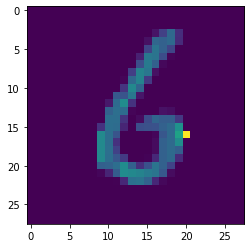

In [57]:
plt.imshow(x_test[50])